# inter-run comparisons of N contained in phytoplankton
    - S3
    - Sentry Shoal
    - Central Node
    - JDF

In [13]:
import pandas as pd
import netCDF4 as nc
import datetime as dt
import subprocess
import requests
import matplotlib.pyplot as plt
import cmocean
import numpy as np
import os
import re
import dateutil as dutil
from salishsea_tools import viz_tools, places
import glob
import pickle
import matplotlib.dates as mdates
import matplotlib as mpl
import gsw
mpl.rc('xtick', labelsize=14) 
mpl.rc('ytick', labelsize=16) 
mpl.rc('legend', fontsize=16) 
mpl.rc('axes', titlesize=16) 
mpl.rc('figure', titlesize=16) 
mpl.rc('axes', labelsize=16) 
mpl.rc('font', size=16) 

mpl.rcParams['font.size'] = 16
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['legend.numpoints'] = 1
%matplotlib inline

In [2]:
plist=['Sentry Shoal','S3','Central node','Central SJDF']

In [5]:
flist=['BritishColumbiaFerries_Tsawwassen-DukePoint_Thermosalinograph_20170216T174923Z_20170304T140345Z-clean.csv',
'BritishColumbiaFerries_Tsawwassen-DukePoint_Thermosalinograph_20170304T140346Z_20170324T121939Z-clean.csv',
'BritishColumbiaFerries_Tsawwassen-DukePoint_Thermosalinograph_20170324T121940Z_20170412T050028Z-clean.csv',
'BritishColumbiaFerries_Tsawwassen-DukePoint_Thermosalinograph_20170412T050029Z_20170506T070227Z-clean.csv',
'BritishColumbiaFerries_Tsawwassen-DukePoint_Thermosalinograph_20170506T070228Z_20170526T161834Z-clean.csv',
'BritishColumbiaFerries_Tsawwassen-DukePoint_Thermosalinograph_20170526T161835Z_20170615T045516Z-clean.csv',
'BritishColumbiaFerries_Tsawwassen-DukePoint_Thermosalinograph_20170615T045517Z_20170704T155339Z-clean.csv',
'BritishColumbiaFerries_Tsawwassen-DukePoint_Thermosalinograph_20170704T155340Z_20170723T062021Z-clean.csv',
'BritishColumbiaFerries_Tsawwassen-DukePoint_Thermosalinograph_20170723T062022Z_20170810T230447Z-clean.csv',
'BritishColumbiaFerries_Tsawwassen-DukePoint_Thermosalinograph_20170810T230448Z_20170825T225506Z-clean.csv']

In [6]:
dfs=list()
for ii in range(0,len(flist)):
    dfs.append(pd.read_csv('/ocean/eolson/MEOPAR/obs/ONC/thermosalinograph/nearSurface/search4979681/'+flist[ii],
        skiprows=67,header=None,usecols=[0,1,2,3,4,5,6,7,8,9,10],
        names=('TimeUTC','Conductivity', 'ConductivityQCFlag'  , 'PracticalSalinity_psu', 'PracticalSalQCFlag',
               'Temperature_C', 'TQCFlag'  , 'Lat', 'LatQCFlag', 'Lon', 'LonQCFlag', 'Pitchdeg', 'PitchQCFlag',
               'Rolldeg','RollQCFlag', 'TrueHeading_deg', 'TrueHeadingQCFlag')))

/home/eolson/anaconda3/envs/python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (1,5,7,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/eolson/anaconda3/envs/python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (7,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/eolson/anaconda3/envs/python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (1,3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
df=pd.concat(dfs,ignore_index=True)

In [8]:
dts=[dt.datetime(int(r[0:4]),int(r[5:7]),int(r[8:10]),int(r[11:13]),int(r[14:16]),int(r[17:19])) for r in df['TimeUTC']]

In [9]:
df=df.assign(dts=dts)

In [10]:
df['Lat']=pd.to_numeric(df['Lat'],errors='coerce')
df['Lon']=pd.to_numeric(df['Lon'],errors='coerce')

In [14]:
sa=[gsw.SA_from_SP(i,1.0,k,l) for i,k,l in zip(df['PracticalSalinity_psu'],df['Lon'],df['Lat'])]
ct=[gsw.CT_from_t(i,j,1.0) for i,j in zip(sa,df['Temperature_C'])]
df['SA']=sa
df['CT']=ct

In [21]:
df.head()

,TimeUTC,Conductivity,ConductivityQCFlag,PracticalSalinity_psu,PracticalSalQCFlag,Temperature_C,TQCFlag,Lat,LatQCFlag,Lon,LonQCFlag,dts,SA,CT
0,2017-02-16T17:49:38.256Z,NaN,9,29.0422,0,NaN,9,NaN,9,NaN,9,2017-02-16 17:49:38,NaN,NaN
1,2017-02-16T17:49:39.256Z,NaN,9,29.0411,0,NaN,9,NaN,9,NaN,9,2017-02-16 17:49:39,NaN,NaN
2,2017-02-16T17:49:40.256Z,NaN,9,29.0409,0,NaN,9,NaN,9,NaN,9,2017-02-16 17:49:40,NaN,NaN
3,2017-02-16T17:49:41.256Z,NaN,9,29.0422,0,NaN,9,NaN,9,NaN,9,2017-02-16 17:49:41,NaN,NaN
4,2017-02-16T17:49:42.256Z,NaN,9,29.0423,0,NaN,9,NaN,9,NaN,9,2017-02-16 17:49:42,NaN,NaN


In [18]:
llon=places.PLACES['S3']['lon lat'][0]-.01
ulon=places.PLACES['S3']['lon lat'][0]+.01
llat=places.PLACES['S3']['lon lat'][1]-.01
ulat=places.PLACES['S3']['lon lat'][1]+.01
iidfnd=(df.Lon>llon)&(df.Lon<ulon)&(df.Lat>llat)&(df.Lat<ulat)

(736330.0, 736695.0)

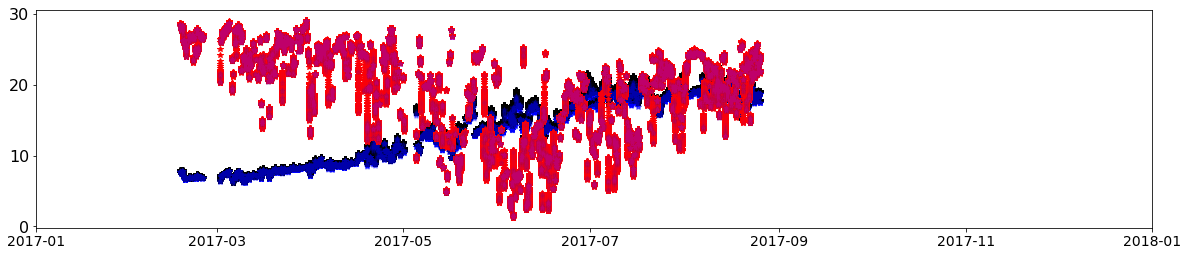

In [25]:
fig,ax=plt.subplots(1,1,figsize=(20,4))
ax.plot(df.loc[iidfnd,['dts']],df.loc[iidfnd,['CT']],'k*')
ax.plot(df.loc[iidfnd,['dts']],df.loc[iidfnd,['Temperature_C']],'b*',alpha=.01)
ax.plot(df.loc[iidfnd,['dts']],df.loc[iidfnd,['SA']],'r*')
ax.plot(df.loc[iidfnd,['dts']],df.loc[iidfnd,['PracticalSalinity_psu']],'m*',alpha=.01)
ax.set_xlim(dt.datetime(2017,1,1),dt.datetime(2018,1,1))
#dt.datetime(2014,12,31)+dt.timedelta(days=65),dt.datetime(2014,12,31)+dt.timedelta(days=75)

In [26]:
with nc.Dataset('/ocean/eolson/MEOPAR/NEMO-forcing/grid/mesh_mask201702_noLPE.nc') as fm:
    tmask=np.copy(fm.variables['tmask'])
    umask=np.copy(fm.variables['umask'])
    vmask=np.copy(fm.variables['vmask'])
    navlon=np.copy(fm.variables['nav_lon'])
    navlat=np.copy(fm.variables['nav_lat'])
    e3t_0=np.copy(fm.variables['e3t_0'])
    e3u_0=np.copy(fm.variables['e3u_0'])
    e3v_0=np.copy(fm.variables['e3v_0'])
    e1t=np.copy(fm.variables['e1t'])
    e2t=np.copy(fm.variables['e2t'])
    e1v=np.copy(fm.variables['e1v'])
    e2u=np.copy(fm.variables['e2u'])
    A=fm.variables['e1t'][0,:,:]*fm.variables['e2t'][0,:,:]*tmask[0,0,:,:]
#stm=np.shape(tmask)

In [53]:
#saveloc='/data/eolson/MEOPAR/SS36runs/calcFiles/comparePhytoN/'
baseloc='/data/eolson/MEOPAR/SS36runs/CedarRuns/'
dirname1='hindcast2017P'
dirname2='hindcast2017'
dirnames=(dirname1,dirname2)
#dirnames=('spring2015_NewSink','spring2015_slowPP','spring2015_KhT','spring2015_diatHS')
varNameDict={'Sentry Shoal':'SentryShoal', 'S3':'S3', 'Central node':'CentralNode', 'Central SJDF':'CentralSJDF'}
with open('/ocean/eolson/MEOPAR/analysis-elise/notebooks/bioTuning/spathsMaster.txt') as f:
    spaths = dict(x.strip().split() for x in f)
#spaths={'spring2015_NewSink':'/data/eolson/results/MEOPAR/SS36runs/CedarRuns/spring2015_NewSink/',
#    'spring2015_KhT':'/data/eolson/results/MEOPAR/SS36runs/CedarRuns/spring2015_KhT/',
#    'spring2015_uzoo':'/data/eolson/results/MEOPAR/SS36runs/CedarRuns/spring2015_uzoo/',
#    'spring2015_uzoo2':'/data/eolson/results/MEOPAR/SS36runs/CedarRuns/spring2015_uzoo2/',
#    'spring2015_slowPP':'/data/eolson/results/MEOPAR/SS36runs/OrcinusRuns/spring2015_slowPP/',
#    'spring2015_lowMuNano':'/data/eolson/results/MEOPAR/SS36runs/CedarRuns/spring2015_lowMuNano/',
#    'spring2015_SMELTBFastSink':'/data/eolson/results/MEOPAR/SS36runs/OrcinusRuns/spring2015_SMELTBFastSink/',
#    'spring2015_uzPref':'/data/eolson/results/MEOPAR/SS36runs/CedarRuns/spring2015_uzPref/',
#    'spring2015_hiNH':'/data/eolson/results/MEOPAR/SS36runs/CedarRuns/spring2015_hiNH/'}
ff=dict()
for idir in dirnames:
    ff[idir]=dict()
    for pl in plist:
        print(spaths[idir]+'ts_'+idir+'_'+varNameDict[pl]+'.nc')
        ff[idir][pl]=nc.Dataset(spaths[idir]+'ts_'+idir+'_'+varNameDict[pl]+'.nc')
    #try:
    #    pl='Total'
    #    ff[idir][pl]=nc.Dataset(spaths[idir]+'ts_'+idir+'_'+varNameDict[pl]+'.nc')
    #except:
    #    pass

/data/eolson/results/MEOPAR/SS36runs/calcFiles/comparePhytoN/ts_hindcast2017P_SentryShoal.nc
/data/eolson/results/MEOPAR/SS36runs/calcFiles/comparePhytoN/ts_hindcast2017P_S3.nc
/data/eolson/results/MEOPAR/SS36runs/calcFiles/comparePhytoN/ts_hindcast2017P_CentralNode.nc
/data/eolson/results/MEOPAR/SS36runs/calcFiles/comparePhytoN/ts_hindcast2017P_CentralSJDF.nc
/data/eolson/results/MEOPAR/SS36runs/calcFiles/comparePhytoN/ts_hindcast2017_SentryShoal.nc
/data/eolson/results/MEOPAR/SS36runs/calcFiles/comparePhytoN/ts_hindcast2017_S3.nc
/data/eolson/results/MEOPAR/SS36runs/calcFiles/comparePhytoN/ts_hindcast2017_CentralNode.nc
/data/eolson/results/MEOPAR/SS36runs/calcFiles/comparePhytoN/ts_hindcast2017_CentralSJDF.nc


In [28]:
spaths[idir]+'ts_'+idir+'_'+varNameDict[pl]+'.nc'

'/data/eolson/results/MEOPAR/SS36runs/calcFiles/comparePhytoN/ts_hindcast2017P_CentralSJDF.nc'

In [29]:
spaths[idir]+'ts_'+idir+'_'+varNameDict[pl]+'.nc'

'/data/eolson/results/MEOPAR/SS36runs/calcFiles/comparePhytoN/ts_hindcast2017P_CentralSJDF.nc'

In [54]:
times=dict()
for idir in dirnames:
    f=ff[idir]['S3']
    torig=dt.datetime.strptime(f.variables['time_centered'].time_origin,'%Y-%m-%d %H:%M:%S')
    print(torig)
    times[idir]=np.array([torig + dt.timedelta(seconds=ii) for ii in f.variables['time_centered'][:]])

1900-01-01 00:00:00
1900-01-01 00:00:00


In [72]:
lcol={dirname1:{'votemper':'darkgreen','vosaline':'mediumblue'},
     dirname2:{'diatoms':'c','flagellates':'blueviolet','ciliates':'orange'}}
lsty={dirname1:'-',
      dirname2:'-'}

In [56]:
tmins=list()
tmaxs=list()
for idir in dirnames:
    tmins.append(times[idir][0])
    tmaxs.append(times[idir][-1])
xl=(np.min(np.array(tmins)),np.max(np.array(tmaxs)))

In [41]:
lcol[idir][var]

'darkgreen'

(736361.0, 736450.0)

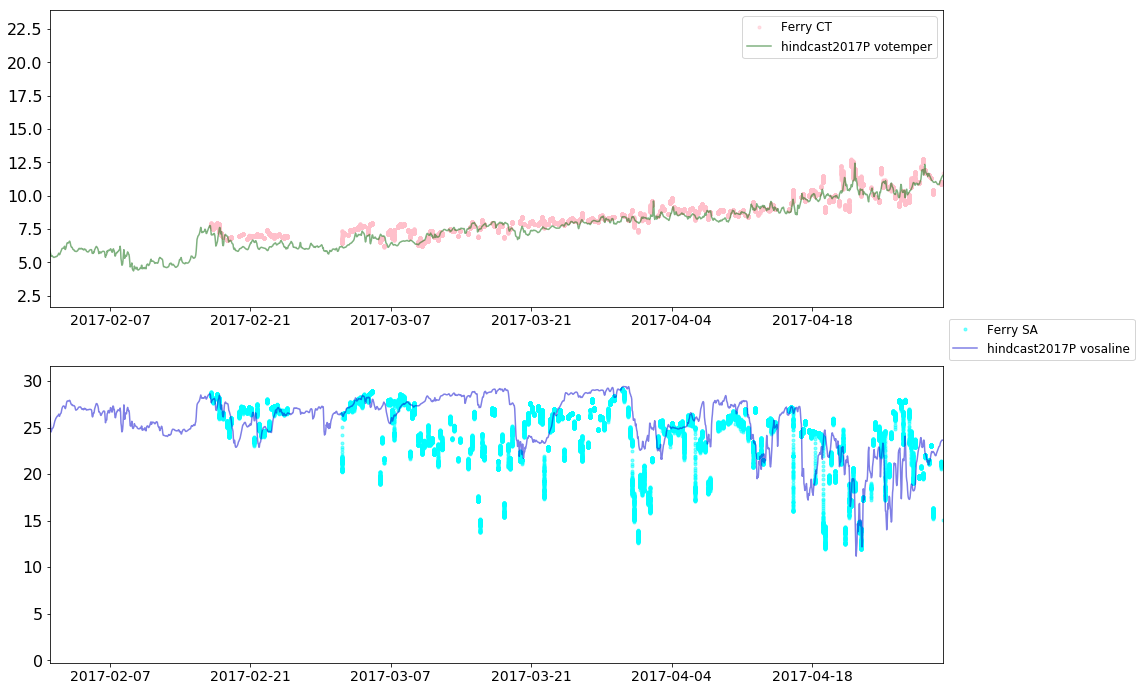

In [50]:
yearsFmt = mdates.DateFormatter('%b %d')
fig,ax=plt.subplots(2,1,figsize=(16,3*(len(plist))))

pl='S3'
idir=dirname1
f=ff[idir][pl]

ii=0
var='votemper'
p01=ax[ii].plot(df.loc[iidfnd,['dts']],[float(ik[0]) for ik in df.loc[iidfnd,['CT']].values],'.',color='pink',alpha=.5,
               label='Ferry CT')
p02=ax[ii].plot(times[idir],
            np.sum(f.variables[var][:,:3,0,0]*f.variables['e3t'][:,:3,0,0],1)/np.sum(f.variables['e3t'][:,:3,0,0],1),
            linestyle=lsty[idir],color=lcol[idir][var],alpha=.5,label=idir+' '+var)
ax[ii].legend(bbox_to_anchor=(1,1),fontsize=12)
ax[ii].set_xlim(dt.datetime(2017,2,1),dt.datetime(2017,5,1))


ii=1
var='vosaline'
p01=ax[ii].plot(df.loc[iidfnd,['dts']],[float(ik[0]) for ik in df.loc[iidfnd,['SA']].values],'.',color='aqua',alpha=.5,
               label='Ferry SA')
p02=ax[ii].plot(times[idir],
            np.sum(f.variables[var][:,:3,0,0]*f.variables['e3t'][:,:3,0,0],1)/np.sum(f.variables['e3t'][:,:3,0,0],1),
            linestyle=lsty[idir],color=lcol[idir][var],alpha=.5,label=idir+' '+var)
ax[ii].legend(bbox_to_anchor=(1,1),fontsize=12)
ax[ii].set_xlim(dt.datetime(2017,2,1),dt.datetime(2017,5,1))

In [51]:
dfp=df.copy(deep=True)

In [62]:
flist=['BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20170217T003041Z_20170315T031911Z-clean.csv',
       'BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20170315T031912Z_20170404T195130Z-clean.csv',
       'BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20170404T195131Z_20170426T173215Z-clean.csv',
       'BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20170426T173216Z_20170522T011843Z-clean.csv',
       'BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20170522T011844Z_20170611T234016Z-clean.csv',
       'BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20170611T234017Z_20170702T172228Z-clean.csv',
       'BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20170702T172229Z_20170722T182606Z-clean.csv',
       'BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20170722T182607Z_20170815T213737Z-clean.csv',
       'BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20170815T213738Z_20170825T225506Z-clean.csv']

In [63]:
dfs=list()
for ii in range(0,len(flist)):
    dfs.append(pd.read_csv('/ocean/eolson/MEOPAR/obs/ONC/turbidity/nearSurface/search4979680/'+flist[ii],
        skiprows=67,header=None,usecols=[0,1,2,3,4,5,6,7,8,9,10],
        names=('TimeUTC','CDOM','CDOMQC','Chlorophyll_ug','ChlQC','Turbidity_NTU','TurbQC','Lat','LatQC','Lon','LongQC')))

/home/eolson/anaconda3/envs/python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (7,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/eolson/anaconda3/envs/python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (3,5,7,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/eolson/anaconda3/envs/python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (1,3,5,7,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/eolson/anaconda3/envs/python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (1) have mixed types. Specify dtype option on impor

In [64]:
df=pd.concat(dfs,ignore_index=True)

In [65]:
dts=[dt.datetime(int(r[0:4]),int(r[5:7]),int(r[8:10]),int(r[11:13]),int(r[14:16]),int(r[17:19])) for r in df['TimeUTC']]
df=df.assign(dts=dts)
df['Lat']=pd.to_numeric(df['Lat'],errors='coerce')
df['Lon']=pd.to_numeric(df['Lon'],errors='coerce')

In [66]:
iidfnd2=(df.Lon>llon)&(df.Lon<ulon)&(df.Lat>llat)&(df.Lat<ulat)

(0, 30)

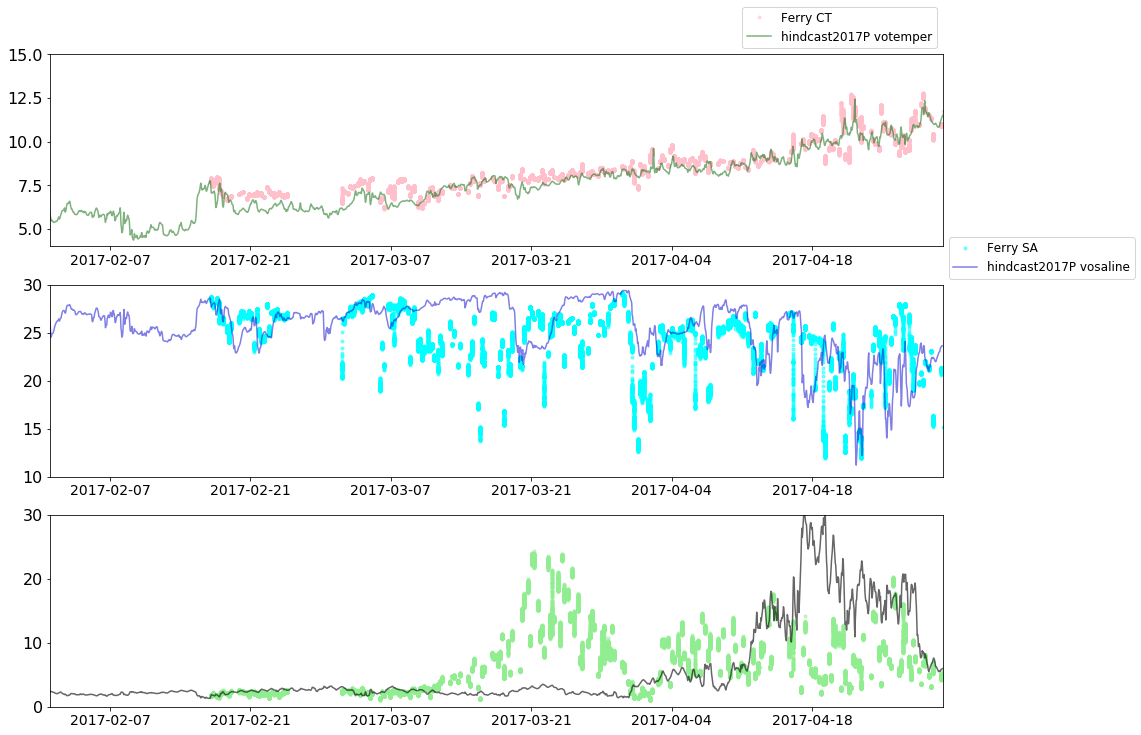

In [74]:
yearsFmt = mdates.DateFormatter('%b %d')
fig,ax=plt.subplots(3,1,figsize=(16,3*(len(plist))))

pl='S3'
idir=dirname1
f=ff[idir][pl]

ii=0
var='votemper'
p01=ax[ii].plot(dfp.loc[iidfnd,['dts']],[float(ik[0]) for ik in dfp.loc[iidfnd,['CT']].values],'.',color='pink',alpha=.5,
               label='Ferry CT')
p02=ax[ii].plot(times[idir],
            np.sum(f.variables[var][:,:3,0,0]*f.variables['e3t'][:,:3,0,0],1)/np.sum(f.variables['e3t'][:,:3,0,0],1),
            linestyle=lsty[idir],color=lcol[idir][var],alpha=.5,label=idir+' '+var)
ax[ii].legend(bbox_to_anchor=(1,1),fontsize=12)
ax[ii].set_xlim(dt.datetime(2017,2,1),dt.datetime(2017,5,1))
ax[ii].set_ylim(4,15)

ii=1
var='vosaline'
p01=ax[ii].plot(dfp.loc[iidfnd,['dts']],[float(ik[0]) for ik in dfp.loc[iidfnd,['SA']].values],'.',color='aqua',alpha=.5,
               label='Ferry SA')
p02=ax[ii].plot(times[idir],
            np.sum(f.variables[var][:,:3,0,0]*f.variables['e3t'][:,:3,0,0],1)/np.sum(f.variables['e3t'][:,:3,0,0],1),
            linestyle=lsty[idir],color=lcol[idir][var],alpha=.5,label=idir+' '+var)
ax[ii].legend(bbox_to_anchor=(1,1),fontsize=12)
ax[ii].set_xlim(dt.datetime(2017,2,1),dt.datetime(2017,5,1))
ax[ii].set_ylim(10,30)

ii=2
idir=dirname2
f=ff[idir][pl]
p01=ax[ii].plot(df.loc[iidfnd2,['dts']],[float(ik[0]) for ik in df.loc[iidfnd2,['Chlorophyll_ug']].values],'.',color='lightgreen',alpha=.5,
               label='Ferry SA')
p02=ax[ii].plot(times[idir],2.0*np.sum((f.variables['diatoms'][:,:3,0,0]+f.variables['flagellates'][:,:3,0,0]+f.variables['ciliates'][:,:3,0,0])*f.variables['e3t'][:,:3,0,0],1)/np.sum(f.variables['e3t'][:,:3,0,0],1),
                          linestyle=lsty[idir],color='k',alpha=.6,label=idir+' '+'total chl')
ax[ii].set_xlim(dt.datetime(2017,2,1),dt.datetime(2017,5,1))
ax[ii].set_ylim(0,30)
#p02=ax[ii].plot(times[idir],2.0*np.sum((f.variables['diatoms'][:,:3,0,0]+f.variables['flagellates'][:,:3,0,0]+f.variables['ciliates'][:,:3,0,0])*f.variables['e3t'][:,:3,0,0],1)/np.sum(f.variables['e3t'][:,:3,0,0],1),
#                          linestyle=lsty[idir],color='k',alpha=.6,label=idir+' '+'total')